
agrupar por cidade
agrupar por ano count total por cidade
valor de univercidade
valor total de univercidade
col: distric code
county(condado):ano -> col:awardee(univercidades(gerar contador))-> toltal recebido

Mantém a D_50 (é redundante, mas deixa la)
Cria d_59 que vai ter tudo 0 ai quando agregarmos ela vai receber o valor de quantas vezes uma mesma universidade apareceu e vc pode usar a coluna d_50 para contar (se quiser)
e uma outra coluna d_99 que vai receber também 0 no começo e quando agregar ela fica com 1,2,3,4... conforme aparecer a mesma universidade mais vezes com valores acima de 50k
No fim temos 3 colunas
d_50 que é uma dummy mesmo
d_59 que tem quantas vezes uma universidade apareceu por ano com valor de 50k, 1,2,3,4...
d_99 que tem quantas vezes uma universidade apareceu por ano com valor ACIMA de 50k, 1,2,3,4...

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('I-corp-Full.csv', index_col = False)
df_final = pd.read_csv('I-corp_panel.csv', index_col = False)

# Analysis

In [3]:
df_final.sort_values('estimatedTotalAmt_d_99', ascending=False)


,awardeeCounty,Year_date,awardee,d_inv,d_59,estimatedTotalAmt,d_99,estimatedTotalAmt_d_99,total
621,Los Angeles,2021,UNIVERSITY OF SOUTHERN CALIFORNIA,1,0,0,1,15000000,15000000
894,Prince George's,2021,"UNIVERSITY OF MARYLAND, COLLEGE PARK",0,4,200000,1,15000000,15200000
902,Princeton,2021,"TRUSTEES OF PRINCETON UNIVERSITY, THE",1,0,0,1,15000000,15000000
40,Ann Arbor,2021,REGENTS OF THE UNIVERSITY OF MICHIGAN,0,7,350000,1,15000000,15350000
167,Brooklyn,2021,RESEARCH FOUNDATION OF THE CITY UNIVERSITY OF ...,0,1,50000,1,15000000,15050000
...,...,...,...,...,...,...,...,...,...
430,Glassboro,2020,ROWAN UNIVERSITY,0,4,200000,0,0,200000
431,Golden,2012,TRUSTEES OF THE COLORADO SCHOOL OF MINES,0,1,50000,0,0,50000
432,Grand Forks,2013,UNIVERSITY OF NORTH DAKOTA,0,1,50000,0,0,50000
433,Grand Forks,2015,UNIVERSITY OF NORTH DAKOTA,0,1,50000,0,0,50000


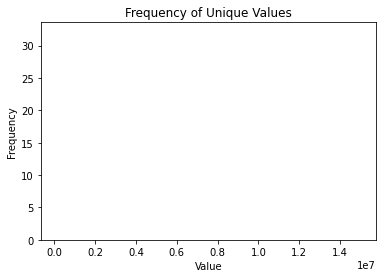

In [64]:
unico = df_final.estimatedTotalAmt_d_99.unique()
len(unico)
filtered_data = df_final[df_final['estimatedTotalAmt_d_99'] != 0]

value_counts = filtered_data['estimatedTotalAmt_d_99'].value_counts().reset_index()

# Rename the columns in the table
value_counts.columns = ['Value', 'Frequency']

# Display the table of frequency and values

value_counts
plt.bar(value_counts['Value'], value_counts['Frequency'])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Values')
plt.show()

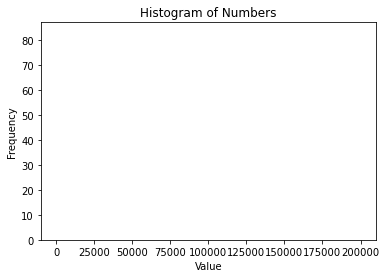

In [36]:
import matplotlib.pyplot as plt
filtered_data = df_final[df_final['estimatedTotalAmt_d_99'] != 0]
value_counts = filtered_data['estimatedTotalAmt_d_99'].value_counts()
bins = np.array([0, 50000, 200000, 15000000])
hist, bin_edges = np.histogram(value_counts.index, bins=bins)
#filtered_data['estimatedTotalAmt_d_99'].plot.hist()
#value_counts.plot(kind='bar')
#plt.hist(filtered_data['estimatedTotalAmt_d_99'], bins='auto')

plt.bar(bin_edges[:-1], hist)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Numbers')

# Display the histogram
plt.show()


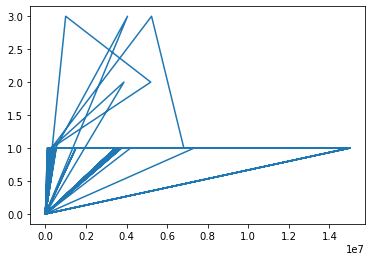

In [34]:
plt.plot(df_final['estimatedTotalAmt_d_99'], df_final['d_99'] )


In [ ]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! abaixo so testes !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
x = data[data['awardee']== 'REGENTS OF THE UNIVERSITY OF CALIFORNIA, THE']
len(x[x['Year_date']== 2017])

In [ ]:
df_below50[df_below50['awardee'] == 'NATIONAL COLLEGIATE INVENTORS & INNOVATORS ALLIANCE, INC.']

In [ ]:
df_below50[df_below50['awardee'] == 'THE UNIVERSITY OF AKRON']

In [ ]:
df_over50[df_over50['awardee'] == 'NATIONAL COLLEGIATE INVENTORS & INNOVATORS ALLIANCE, INC.']

In [ ]:
df_final[df_final['awardee'] == 'NATIONAL COLLEGIATE INVENTORS & INNOVATORS ALLIANCE, INC.']

In [ ]:
#df_melt = pd.melt(data,id_vars= ['Year_date','awardee','estimatedTotalAmt'], value_vars = ['d_inv'] )
#df_melt

In [ ]:
data[data['awardee'] == 'NATIONAL COLLEGIATE INVENTORS & INNOVATORS ALLIANCE, INC.']

In [ ]:
df_50 = df_50.groupby(['Year_date','awardee'])[['estimatedTotalAmt']].sum()# agrupando por county

In [ ]:
df_50 = df_50.reset_index( )


In [ ]:
SELECT * FROM `post` WHERE source_id >= 175 AND created_date < '2023-01-01'
85840

DELETE epecificar a tabela para apagar os dados FROM `insight` INNER JOIN `post` on insight.post_id = post.id WHERE post.source_id = 175 AND post.created_date < '2023-01-01'; 
 numeros de registros apagados 13377784

WITH postIds AS (
 SELECT id FROM post WHERE source_id >= 175 AND created_date < '2023-01-01'
)

DELETE * 
FROM insight
WHERE post_id IN postIds

In [ ]:
79+1125

In [ ]:
df_over50.shape


In [ ]:
x = 0 
for index,row in df_below50.iterrows():
  key = row['awardee']
  met = df_over50[df_over50['awardee'] == key]
  key_year = row['Year_date']
  met_year = met[met['Year_date'] == key_year]
  if met_year.shape[0] > 0:
    x+=1
    print(met_year.index[0])
print(x)

In [ ]:
dif = df_over50[df_over50['awardee'] != key]

In [ ]:
x = df_over50['awardee'] != df_below50['awardee']

In [ ]:
dif

,index,awardeeCounty,Year_date,awardee,d_inv,estimatedTotalAmt,d_59,d_99
0,1,Akron,2013,THE UNIVERSITY OF AKRON,1,300000,1,0
1,6,Akron,2017,THE UNIVERSITY OF AKRON,1,300000,1,0
2,18,Albuquerque,2017,"UNIVERSITY OF NEW MEXICO, THE",1,443631,1,0
3,22,Alexandria,2019,GEM CONSORTIUM,1,3498254,1,0
4,29,Ames,2017,IOWA STATE UNIVERSITY OF SCIENCE AND TECHNOLOGY,1,498750,1,0
...,...,...,...,...,...,...,...,...
163,1254,Washington,2017,"GEORGE WASHINGTON UNIVERSITY, THE",1,499502,1,0
164,1265,West Lafayette,2015,PURDUE UNIVERSITY,1,197280,1,0
165,1269,West Lafayette,2018,PURDUE UNIVERSITY,1,160000,1,0
166,1275,Wichita,2016,WICHITA STATE UNIVERSITY,1,200000,1,0


In [ ]:
df_test = data.groupby(['awardeeCounty','Year_date','awardee'])[['estimatedTotalAmt']].sum()# agrupando por county

In [ ]:
df_test

In [ ]:
#min_value = data.estimatedTotalAmt.min() # menor valor da coluna cfdaNumber
df_50['n_invest'] = df_50.apply(lambda x: x.estimatedTotalAmt/min_value if x.estimatedTotalAmt> min_value else min_value/min_value, axis=1)# add col n

In [ ]:
df_test.reset_index(inplace =True)
df_test.head(4)


In [ ]:
for index, row in df_test.iterrows():
  key = row['awardee']
  met = data[data['awardee']==key]
  

    